<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-16 07:03:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  66.2MB/s    in 3.0s    

2025-07-16 07:03:53 (66.2 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


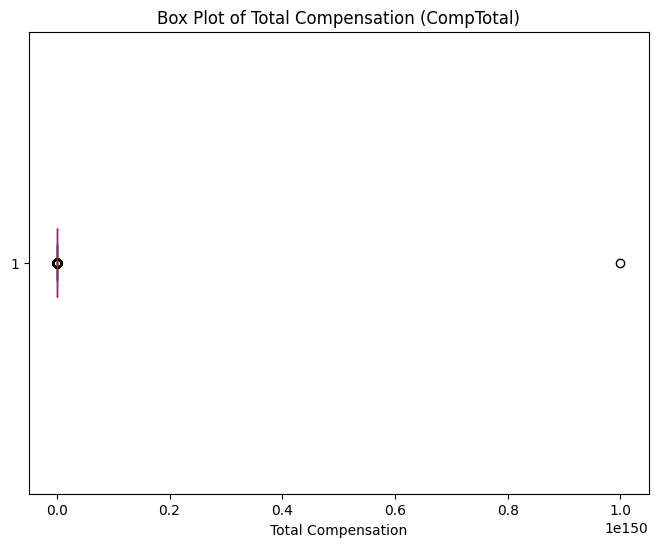

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('survey-data.csv')

# Convert CompTotal to numeric and drop NaNs
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Plot boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df['CompTotal'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


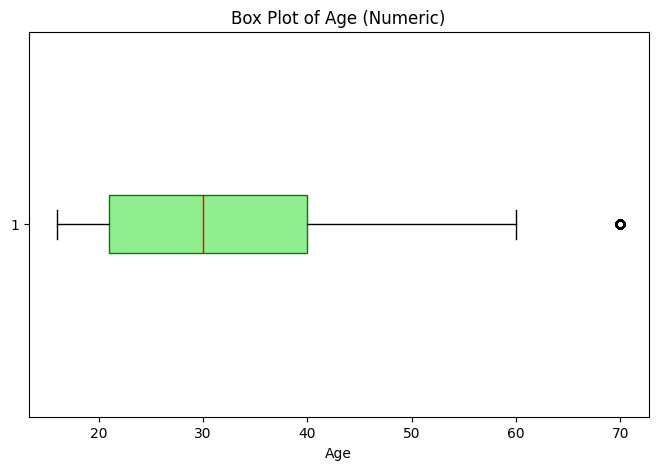

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Inspect Age column unique values to decide how to convert
print(df['Age'].unique())

# Example mapping of Age groups to numeric values (adjust as per your data):
age_mapping = {
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Under 18 years old': 16
}

# Convert Age using mapping, invalid entries become NaN
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with NaN in Age_numeric
df = df.dropna(subset=['Age_numeric'])

# Plot box plot for Age_numeric
plt.figure(figsize=(8, 5))
plt.boxplot(df['Age_numeric'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Age (Numeric)')
plt.xlabel('Age')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


/tmp/ipykernel_813/1974913659.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_age, labels=age_order, patch_artist=True)


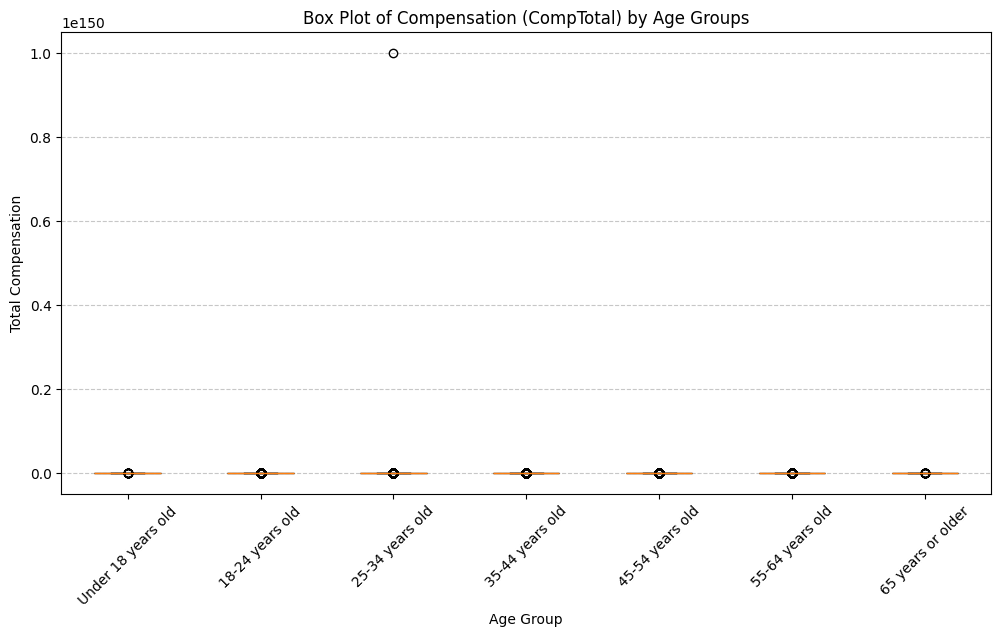

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Check unique age groups
print(df['Age'].unique())

# Clean compensation column (remove NaN or invalid entries)
df = df.dropna(subset=['CompTotal', 'Age'])
df = df[df['CompTotal'] > 0]  # remove zero or negative compensation if any

# Optional: sort Age groups for better x-axis order if they are categorical
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Filter dataframe to only keep rows with Age in age_order
df = df[df['Age'].isin(age_order)]

# Create list of compensation lists grouped by Age for boxplot
comp_by_age = [df[df['Age'] == age]['CompTotal'] for age in age_order]

# Plot box plot grouped by Age
plt.figure(figsize=(12, 6))
plt.boxplot(comp_by_age, labels=age_order, patch_artist=True)

plt.title('Box Plot of Compensation (CompTotal) by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_813/1163423663.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_jobsat, labels=job_sat_order, patch_artist=True)


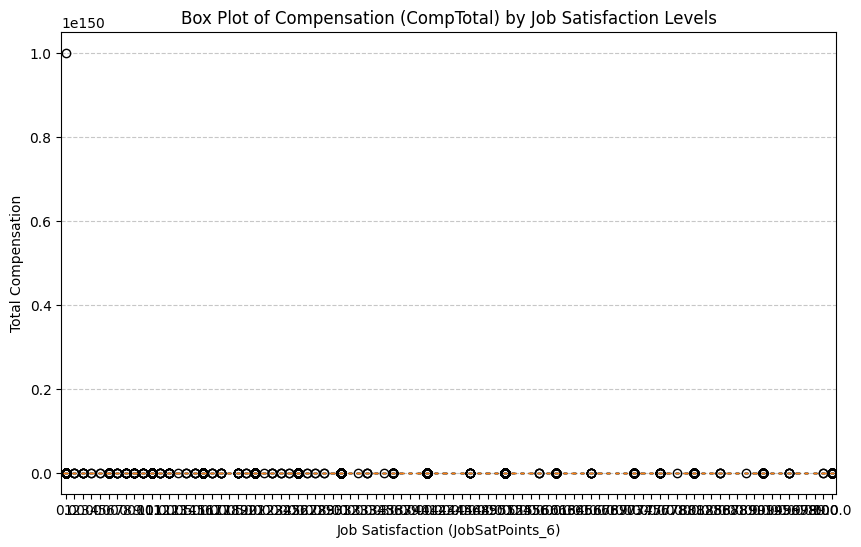

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey-data.csv')

# Drop rows with missing values in CompTotal or JobSatPoints_6
df_clean = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Filter out invalid or zero compensation
df_clean = df_clean[df_clean['CompTotal'] > 0]

# Optional: sort job satisfaction levels if needed
job_sat_order = sorted(df_clean['JobSatPoints_6'].unique())

# Group CompTotal by JobSatPoints_6
comp_by_jobsat = [df_clean[df_clean['JobSatPoints_6'] == level]['CompTotal'] for level in job_sat_order]

# Plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(comp_by_jobsat, labels=job_sat_order, patch_artist=True)

plt.title('Box Plot of Compensation (CompTotal) by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Total Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

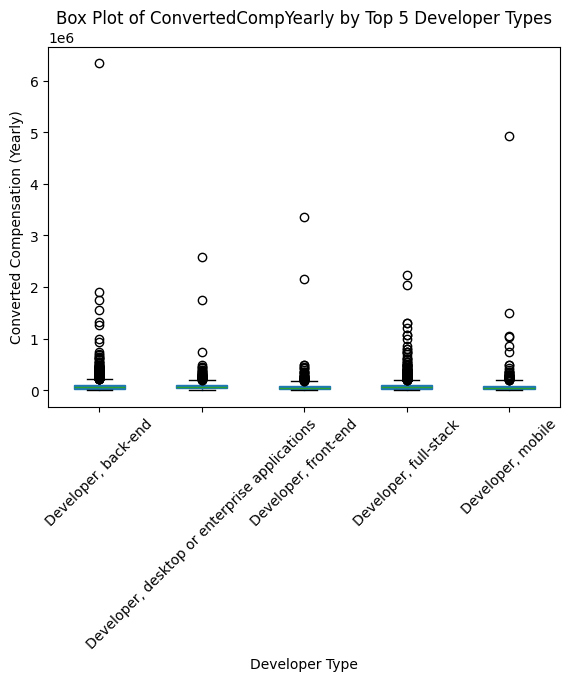

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Drop rows with missing values in ConvertedCompYearly and DevType
df_clean = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# Filter out zero or invalid compensation
df_clean = df_clean[df_clean['ConvertedCompYearly'] > 0]

# The DevType column can contain multiple developer types separated by ';'
# We need to explode the rows by splitting DevType to handle each developer type separately

df_clean = df_clean.assign(DevType=df_clean['DevType'].str.split(';')).explode('DevType')

# Get the top 5 most frequent developer types
top5_devtypes = df_clean['DevType'].value_counts().nlargest(5).index

# Filter for only those top 5 dev types
df_top5 = df_clean[df_clean['DevType'].isin(top5_devtypes)]

# Plot boxplot of compensation by developer type
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False, patch_artist=True)
plt.title('Box Plot of ConvertedCompYearly by Top 5 Developer Types')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation (Yearly)')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

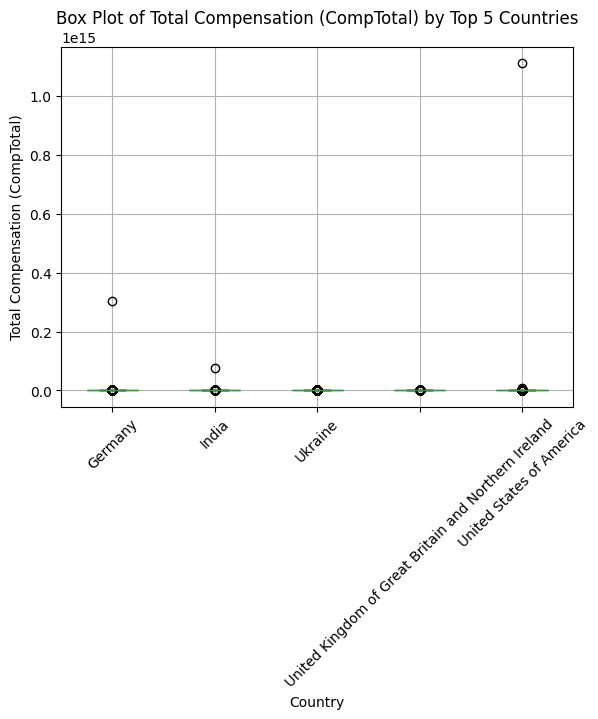

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Drop rows with missing or zero CompTotal and Country values
df_clean = df.dropna(subset=['CompTotal', 'Country'])
df_clean = df_clean[df_clean['CompTotal'] > 0]

# Find top 5 countries by number of respondents
top5_countries = df_clean['Country'].value_counts().nlargest(5).index

# Filter data for top 5 countries
df_top5 = df_clean[df_clean['Country'].isin(top5_countries)]

# Plot boxplot of CompTotal by Country
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='CompTotal', by='Country', patch_artist=True)
plt.title('Box Plot of Total Compensation (CompTotal) by Top 5 Countries')
plt.suptitle('')  # Remove default subplot title
plt.xlabel('Country')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=45)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# your code goes here

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
